## Revising Pandas

In [1]:
import pandas as pd

In [2]:
orders = pd.read_table('http://bit.ly/chiporders')

In [3]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
user_cols = ["Name of col 1", "name of col 2", "name of col 3", "name of col 4", "test1", "test2", "test3"]
users = pd.read_table('http://bit.ly/movieusers', sep="|", header = None, names = user_cols)

## All strings in user_cols will be given as names of the columns, 

# if lesser names are provided than number of columns, like 3 names for 5 cols.,
# last 3 cols will be given the names, and rest cols would act as row headings

# While if more names are given, last rows will be filled up by "NaN" (Not a Number)


users

,Name of col 1,name of col 2,name of col 3,name of col 4,test1,test2,test3
0,1,24,M,technician,85711,NaN,NaN
1,2,53,F,other,94043,NaN,NaN
2,3,23,M,writer,32067,NaN,NaN
3,4,24,M,technician,43537,NaN,NaN
4,5,33,F,other,15213,NaN,NaN
...,...,...,...,...,...,...,...
938,939,26,F,student,33319,NaN,NaN
939,940,32,M,administrator,02215,NaN,NaN
940,941,20,M,student,97229,NaN,NaN
941,942,48,F,librarian,78209,NaN,NaN


In [5]:
print(users["name of col 4"])
# printing a particular column
print(type(users))
# To show that the object is a pandas dataframe

0         technician
1              other
2             writer
3         technician
4              other
           ...      
938          student
939    administrator
940          student
941        librarian
942          student
Name: name of col 4, Length: 943, dtype: object
<class 'pandas.core.frame.DataFrame'>


In [6]:
users.test1
# Other way of calling out to print a column, 
# TIP: try not to give spaces in the names of the columns

0      85711
1      94043
2      32067
3      43537
4      15213
       ...  
938    33319
939    02215
940    97229
941    78209
942    77841
Name: test1, Length: 943, dtype: object

In [7]:
# to print the dimensions of the dataframe
users.shape

(943, 7)

In [8]:
# similar to string append feature ---> "ab" + "cd" = "abcd", we can do it with pandas series

users["newly_inserted_column"] = users["name of col 4"] + ', ' + users["name of col 3"]

# NOTE: works only for strings

users.head()

,Name of col 1,name of col 2,name of col 3,name of col 4,test1,test2,test3,newly_inserted_column
0,1,24,M,technician,85711,NaN,NaN,"technician, M"
1,2,53,F,other,94043,NaN,NaN,"other, F"
2,3,23,M,writer,32067,NaN,NaN,"writer, M"
3,4,24,M,technician,43537,NaN,NaN,"technician, M"
4,5,33,F,other,15213,NaN,NaN,"other, F"


In [9]:
# Get the statistics of the table columns with numeric values
users.describe(include = ["object"])

,name of col 3,name of col 4,test1,newly_inserted_column
count,943,943,943,943
unique,2,21,795,41
top,M,student,55414,"student, M"
freq,670,196,9,136


In [10]:
users.describe()

,Name of col 1,name of col 2,test2,test3
count,943.000000,943.000000,0.0,0.0
mean,472.000000,34.051962,NaN,NaN
std,272.364951,12.192740,NaN,NaN
min,1.000000,7.000000,NaN,NaN
25%,236.500000,25.000000,NaN,NaN
50%,472.000000,31.000000,NaN,NaN
75%,707.500000,43.000000,NaN,NaN
max,943.000000,73.000000,NaN,NaN


In [11]:
users.dtypes

Name of col 1              int64
name of col 2              int64
name of col 3             object
name of col 4             object
test1                     object
test2                    float64
test3                    float64
newly_inserted_column     object
dtype: object

### TIP: 
- for using the dot notation with data frames, type "users." and then hit **TAB** for finding all possible options.
- for finding the possible parameters of a function, bring the cursor in the parenthesis, and the press **"SHIFT + TAB"**

In [12]:
ufo = pd.read_csv('https://bit.ly/uforeports')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [13]:
ufo.shape

(18241, 5)

#### How to remove columns from UFO dataframe?

In [14]:
ufo.drop("Colors Reported", axis = 1, inplace=True)

In [15]:
ufo.head() # Colors Reported column vanished

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00


In [16]:
##### For dropping rows, we can do.... i.e., mention the indexes which are the row headings.
ufo.drop([0,1], axis = 0, inplace=True)
ufo.head()

,City,Shape Reported,State,Time
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00
5,Valley City,DISK,ND,9/15/1934 15:30
6,Crater Lake,CIRCLE,CA,6/15/1935 0:00


### HOW TO SORT PANDAS DATAFRAMES OR SERIES

In [17]:
movies = pd.read_csv('http://bit.ly/imdbratings')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [18]:
# strings are sorted in alphabetical orders, with words having leading numbers coming first
movies['title'].sort_values()

542     (500) Days of Summer
5               12 Angry Men
201         12 Years a Slave
698                127 Hours
110    2001: A Space Odyssey
               ...          
955         Zero Dark Thirty
677                   Zodiac
615               Zombieland
526                     Zulu
864                    [Rec]
Name: title, Length: 979, dtype: object

In [19]:
movies['title'].sort_values(ascending = False) 
# sorting in descending order

864                    [Rec]
526                     Zulu
615               Zombieland
677                   Zodiac
955         Zero Dark Thirty
               ...          
110    2001: A Space Odyssey
698                127 Hours
201         12 Years a Slave
5               12 Angry Men
542     (500) Days of Summer
Name: title, Length: 979, dtype: object

In [20]:
print(movies.to_string())
# to view complete dataframe

     star_rating                                                                 title content_rating      genre  duration                                                                      actors_list
0            9.3                                              The Shawshank Redemption              R      Crime       142                               [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']
1            9.2                                                         The Godfather              R      Crime       175                                  [u'Marlon Brando', u'Al Pacino', u'James Caan']
2            9.1                                                The Godfather: Part II              R      Crime       200                              [u'Al Pacino', u'Robert De Niro', u'Robert Duvall']
3            9.0                                                       The Dark Knight          PG-13     Action       152                           [u'Christian Bale', u'Heath Ledger'

In [21]:
# to sort the dataframe according to a particular series but also able to see complete dataframe with it

movies.sort_values('title')

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."
...,...,...,...,...,...,...
955,7.4,Zero Dark Thirty,R,Drama,157,"[u'Jessica Chastain', u'Joel Edgerton', u'Chri..."
677,7.7,Zodiac,R,Crime,157,"[u'Jake Gyllenhaal', u'Robert Downey Jr.', u'M..."
615,7.7,Zombieland,R,Comedy,88,"[u'Jesse Eisenberg', u'Emma Stone', u'Woody Ha..."
526,7.8,Zulu,UNRATED,Drama,138,"[u'Stanley Baker', u'Jack Hawkins', u'Ulla Jac..."


## Filtering out the entries 

In [22]:
booleans = []
for length in movies.duration: # or movies['duration']
    if length >= 200:
        booleans.append(True)
    else:
        booleans.append(False)
    
booleans[0:5]

[False, False, True, False, False]

In [23]:
is_long = pd.Series(booleans)
is_long

0      False
1      False
2       True
3      False
4      False
       ...  
974    False
975    False
976    False
977    False
978    False
Length: 979, dtype: bool

In [24]:
movies[is_long] #this gets the list of all required movies having boolean value = True for > 200 duration.

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."




## The Above METHOD was a long way to get our result

In [25]:
# We need not to write the complete for loop
# instead we can do

is_long = movies["duration"] >= 200
is_long.head()

0    False
1    False
2     True
3    False
4    False
Name: duration, dtype: bool

In [26]:
# hence we can directly get the required rows from 'movies'

movies[movies.duration >= 200] # or in the bracket, we can write movies['duration'] >= 200

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [27]:
movies[movies.duration >= 200]['genre'] #get a particular series from the Dataframe

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

In [28]:
movies.loc[movies.duration >= 200, 'genre']
#METHOD 2 for the above cell

## THIS IS THE BEST PRACTICE FOR DOING THE ABOVE PROCESS.

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

# Exploring Pandas Series

In [30]:
import pandas as pd

movies = pd.read_csv('http://bit.ly/imdbratings')

movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [32]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [33]:
movies.genre.describe() # describe() is also a Series method

# Drama is the most common category and freq shows its frequency

count       979
unique       16
top       Drama
freq        278
Name: genre, dtype: object

In [34]:
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [35]:
movies.genre.value_counts(normalize = True)

Drama        0.283963
Comedy       0.159346
Action       0.138917
Crime        0.126660
Biography    0.078652
Adventure    0.076609
Animation    0.063330
Horror       0.029622
Mystery      0.016343
Western      0.009193
Sci-Fi       0.005107
Thriller     0.005107
Film-Noir    0.003064
Family       0.002043
History      0.001021
Fantasy      0.001021
Name: genre, dtype: float64

In [37]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

In [38]:
movies.genre.nunique()

16

In [40]:
pd.crosstab(movies.genre, movies.content_rating)

content_rating,APPROVED,G,GP,NC-17,NOT RATED,PASSED,PG,PG-13,R,TV-MA,UNRATED,X
genre,,,,,,,,,,,,
Action,3,1,1,0,4,1,11,44,67,0,3,0
Adventure,3,2,0,0,5,1,21,23,17,0,2,0
Animation,3,20,0,0,3,0,25,5,5,0,1,0
Biography,1,2,1,0,1,0,6,29,36,0,0,0
Comedy,9,2,1,1,16,3,23,23,73,0,4,1
Crime,6,0,0,1,7,1,6,4,87,0,11,1
Drama,12,3,0,4,24,1,25,55,143,1,9,1
Family,0,1,0,0,0,0,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,1,0,0,0


In [41]:
movies.duration.describe()

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

In [42]:
movies.duration.value_counts()

112    23
113    22
102    20
101    20
129    19
       ..
67      1
195     1
76      1
66      1
205     1
Name: duration, Length: 133, dtype: int64

<AxesSubplot:ylabel='Frequency'>

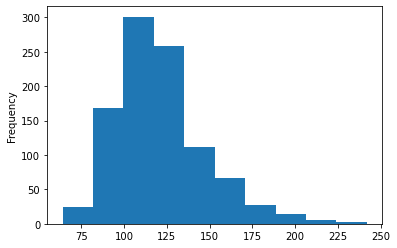

In [44]:
%matplotlib inline
movies.duration.plot(kind="hist")

# How to handle missing values in Pandas ?

In [45]:
import pandas as pd

In [47]:
ufo = pd.read_csv('http://bit.ly/uforeports')
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [50]:
ufo.notnull().tail() # True for non NAN values else False

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [54]:
ufo.isnull().sum() #number of missing values in each column

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [55]:
pd.Series([True, False, True, True]).sum()

3

In [56]:
ufo[ufo.City.isnull()] # All 25 values are shown here

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [60]:
print('original dimensions', ufo.shape)
ufo.dropna(how = "any").shape # dropped almost all entries

original dimensions (18241, 5)


(2486, 5)

In [61]:
ufo.dropna(how="all").shape # since Time and State have 0 Nan vals, nothing is dropped

(18241, 5)

In [63]:
ufo.dropna(subset=["City", "Shape Reported"],how="all").shape 
# only drop if values in both City and Shape Reported are Nan

(18237, 5)

In [64]:
ufo['Shape Reported'].value_counts(dropna = False)

LIGHT        2803
NaN          2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
DOME            1
PYRAMID         1
FLARE           1
HEXAGON         1
Name: Shape Reported, dtype: int64

In [68]:
ufo['Shape Reported'].fillna("VARIABLE", inplace = True)
ufo['Shape Reported'].value_counts()

LIGHT        2803
VARIABLE     2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
DOME            1
PYRAMID         1
FLARE           1
HEXAGON         1
Name: Shape Reported, dtype: int64

# Creating a Kaggle Notebook using Pandas

In [1]:
import pandas as pd

train = pd.read_csv("http://bit.ly/kaggletrain")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
feature_cols = ['Pclass', 'Parch'] # Parch => Parents and Children

In [3]:
x = train.loc[: , feature_cols]
x

,Pclass,Parch
0,3,0
1,1,0
2,3,0
3,1,0
4,3,0
...,...,...
886,2,0
887,1,0
888,3,2
889,1,0


In [6]:
y = train.Survived # OR train['Survived']
y.shape

(891,)

In [11]:
!conda install pip

Solving environment: done

# All requested packages already installed.



In [15]:
!pip3 install scikit-learn

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logreg = LogisticRegression()

In [21]:
logreg.fit(x,y)

LogisticRegression()

In [23]:
test = pd.read_csv('http://bit.ly/kaggletest')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
x_new = test.loc[: , feature_cols]
x_new.shape

(418, 2)

In [29]:
new_pred_class = logreg.predict(x_new)
new_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [34]:

# PUTTING THE GATHERED OUTPUT IN A NEW CSV FILE...

pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': new_pred_class}).set_index('PassengerId').to_csv('kaggle.csv')

# How to get Dummy variables in Pandas